c:\Users\Engineer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


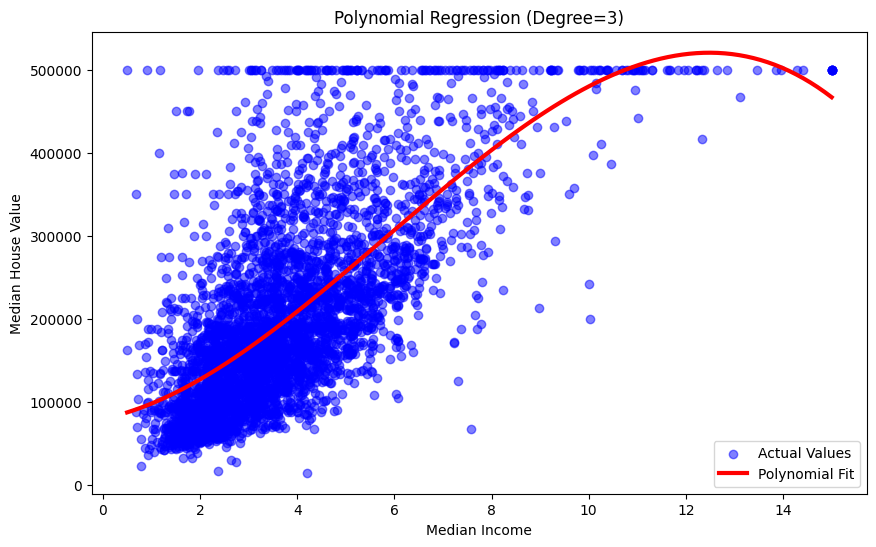

R² Score: 0.467


In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Load dataset (replace with your path)
try:
    df = pd.read_csv('housing.csv')
except FileNotFoundError:
    print("Dataset not found! Download from Kaggle:")
    print("https://www.kaggle.com/datasets/camnugent/california-housing-prices")


# Use non-linear relationship: income vs. house value
X_poly = df[['median_income']]
y_poly = df['median_house_value']

# Split data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly, y_poly, test_size=0.2, random_state=42
)

# Transform to polynomial features (degree=3)
poly_transformer = PolynomialFeatures(degree=3)
X_train_poly_trans = poly_transformer.fit_transform(X_train_poly)
X_test_poly_trans = poly_transformer.transform(X_test_poly)

# Train polynomial model
poly_model = LinearRegression()
poly_model.fit(X_train_poly_trans, y_train_poly)

# Generate prediction curve
X_curve = np.linspace(X_poly.min(), X_poly.max(), 100).reshape(-1, 1)
X_curve_trans = poly_transformer.transform(X_curve)
y_curve = poly_model.predict(X_curve_trans)

# Plot results
plt.figure(figsize=(10,6))
plt.scatter(X_test_poly, y_test_poly, color='blue', alpha=0.5, label='Actual Values')
plt.plot(X_curve, y_curve, color='red', linewidth=3, label='Polynomial Fit')
plt.title('Polynomial Regression (Degree=3)')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

# Calculate R² score
y_pred_poly = poly_model.predict(X_test_poly_trans)
print(f"R² Score: {r2_score(y_test_poly, y_pred_poly):.3f}")